# Predicting the house price of Boston House Dataset
This dataset was download from Kaggle: https://www.kaggle.com/datasets/altavish/boston-housing-dataset

There are 14 attributes in each case of the dataset. They are:
 * CRIM - per capita crime rate by town
 * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS - proportion of non-retail business acres per town.
 * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 * NOX - nitric oxides concentration (parts per 10 million)
 * RM - average number of rooms per dwelling
 * AGE - proportion of owner-occupied units built prior to 1940
 * DIS - weighted distances to five Boston employment centres
 * RAD - index of accessibility to radial highways
 * TAX - full-value property-tax rate per $10000
 
 * PTRATIO - pupil-teacher ratio by town
 
 * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 * LSTAT - % lower status of the population
 
 * MEDV - Median value of owner-occupied homes in $1000's

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [75]:
df = pd.read_csv("Dataset/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [76]:
df.shape

(506, 14)

In [77]:
len(df)

506

In [78]:
df["Price"] = df["MEDV"]
df.drop("MEDV", axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Exploratory Data Analysis

In [80]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [82]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [83]:
df.dropna(inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [84]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


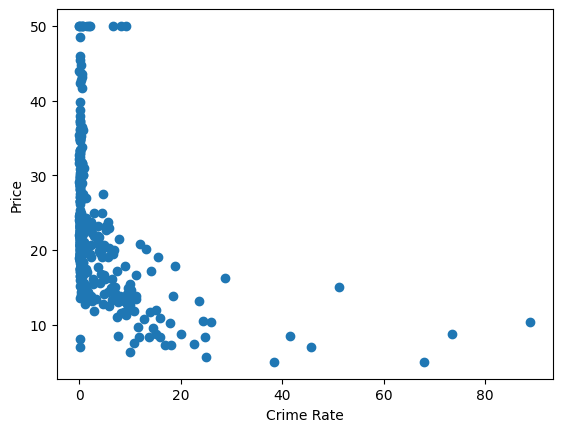

In [85]:
plt.scatter(df['CRIM'], df['Price']);
plt.xlabel("Crime Rate");
plt.ylabel("Price");

### As the crime rate (↑) the price (↓), thus they have negative correlation.

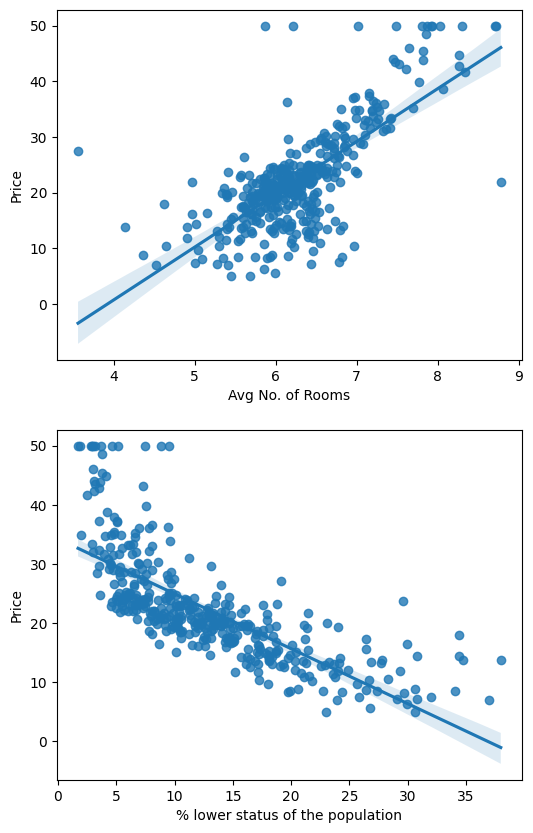

In [86]:
fig, ax = plt.subplots(2, 1, figsize=(6,10))

sns.regplot(x='RM', y="Price", data=df, ax=ax[0]);
ax[0].set_xlabel("Avg No. of Rooms");
ax[0].set_ylabel("Price");


sns.regplot(x='LSTAT', y="Price", data=df, ax=ax[1]);
ax[1].set_xlabel("% lower status of the population");
ax[1].set_ylabel("Price");

### Observation: 
> When the Avg. number of rooms increases the price increases and
> When the % lower status of the population increases then price drops.

## Splitting the data

In [87]:
x = df.drop("Price", axis=1)
y = df["Price"]

x.head(2), y.head(5)

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  \
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 
        B  LSTAT  
 0  396.9   4.98  
 1  396.9   9.14  ,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 5    28.7
 Name: Price, dtype: float64)

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(275, 119, 275, 119)

## Standardization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

x_train

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.40288864,  0.11593724],
       [ 0.04316861, -0.48865541,  1.04820426, ...,  0.75829743,
        -3.55599998,  0.81143377],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  1.13142523,
         0.35532602, -0.02235647],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.1053238 ,
         0.3314929 , -0.32713969],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.75829743,
         0.44817157,  0.69327992],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.24524672,
         0.25325809,  0.66642677]])

## Model Training

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluation(y_test, pred):
    
    dic = {
        "r2 score": r2_score(y_test, pred),
        "Mean Absolute Error": mean_absolute_error(y_test, pred),
        "Mean Squared Error": mean_squared_error(y_test, pred),
        "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, pred))
    }
    
    return dic

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [62]:
print(model.coef_)

[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
 -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
 -2.71551439]


In [63]:
print(model.intercept_)

21.872363636363634


In [65]:
pred = model.predict(x_test)
pred

array([29.4740629 , 16.37996746, 21.52711342, 29.780343  , 18.04900191,
       33.67985764, 21.99074838, 29.58417588, 32.31794971, 14.32018521,
       21.50907473, 40.01643159, 20.75617092, 16.1887228 , 17.79780198,
       19.4250608 , 15.4010506 , 14.72719577, 20.83030121, 11.38425023,
       18.19855522, 19.9193029 , 14.91561816, 28.71482167, 25.78269283,
       15.58394764, 26.7838576 , 31.33708909, 23.49776506, 26.73893931,
       40.23784446, 16.25798323, 20.36653449, 15.6681383 , 17.12775581,
       20.56961082, 21.09106267, 21.3086931 , 22.96967904, 20.50393574,
       27.62529586, 34.46939649, 20.85284376, 30.33069412, 33.84765941,
       19.37388337, 24.21183015,  6.46586601, 19.21831662, 24.9377608 ,
       21.71314046, 25.29085304, 13.57955522, 17.18936666, 17.80511291,
       23.27771031, 42.81646602, 22.09434468, 15.24563791, 23.25250512,
       20.73845027, 21.08542694, 11.2321196 , 28.62027926, -9.71404469,
       32.04716837, 14.77587283, 30.65998001, 24.7417101 , 19.42

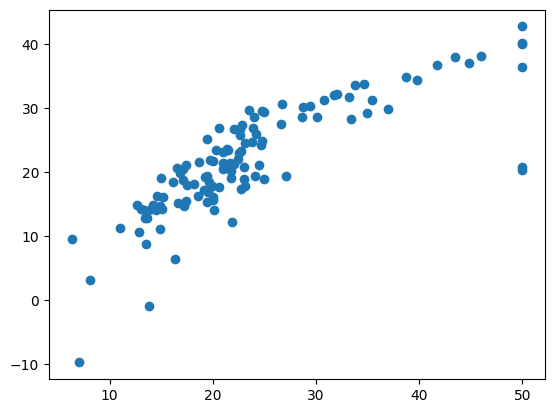

In [69]:
plt.scatter(y_test, pred);

In [70]:
residuals = y_test - pred
residuals

93    -4.474063
352    2.220033
319   -0.527113
65    -6.280343
499   -0.549002
         ...   
358    5.228092
457    4.648591
321   -1.525013
190    7.133616
131    1.128263
Name: Price, Length: 119, dtype: float64

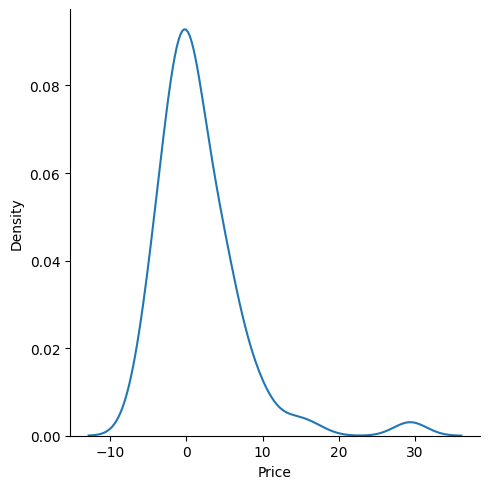

In [71]:
sns.displot(residuals, kind='kde');

In [73]:
evaluation(y_test, pred)

{'r2 score': 0.6364248546526883,
 'Mean Absolute Error': 3.6492025784669173,
 'Mean Squared Error': 33.91693453444478,
 'Root Mean Squared Error': 5.823824734179831}

## Saving the model

In [101]:
import pickle
pickle.dump(model, open("model/regmodel.pkl", "wb"))